In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [2]:
# importing misceallenous libraries
import os
import re
import sys
import string

In [3]:
data = pd.read_csv('/Users/godwin/Desktop/tuesday/challenge-10k/Donor Raw Data_ML with Python.csv')


In [4]:
data.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.00000,19372.000000,19372.000000,19126.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,1079.871929,341.970215,69.698999,15857.334452,1.029011,30.573921,29.603293,32.852467,0.504439,0.931138,1.983998,0.190127,15.365396,0.230808,11.68547,3.043103,1.730539,19.038900,18.668078,47.570514,104.425716,9.979765,12.858338,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,960.753448,164.207807,21.711019,8710.630390,4.918297,11.421471,15.120360,17.839765,0.499993,2.545585,1.099346,0.113947,10.167485,0.186230,10.83412,2.046401,1.535521,3.415559,8.558778,22.950158,105.722460,8.688163,8.787758,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-12.000000,2.000000,5.000000,15.000000,1.000000,1.360000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,518.000000,232.000000,60.000000,10869.000000,0.000000,25.000000,20.000000,21.000000,0.000000,0.000000,1.000000,0.105000,10.000000,0.100000,5.00000,2.000000,1.000000,17.000000,11.000000,28.000000,42.000000,4.000000,8.000000,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,747.000000,311.000000,76.000000,13816.500000,0.000000,31.000000,29.000000,32.000000,1.000000,0.000000,2.000000,0.167000,14.000000,0.200000,10.14000,3.000000,1.000000,18.000000,18.000000,47.000000,79.000000,8.000000,11.200000,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,1227.000000,417.000000,85.000000,18308.250000,0.000000,37.000000,39.000000,43.000000,1.000000,1.000000,3.000000,0.250000,20.000000,0.333000,16.00000,4.000000,2.000000,21.000000,26.000000,64.000000,132.000000,14.000000,15.000000,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,6000.000000,1500.000000,99.000000,174523.000000,97.000000

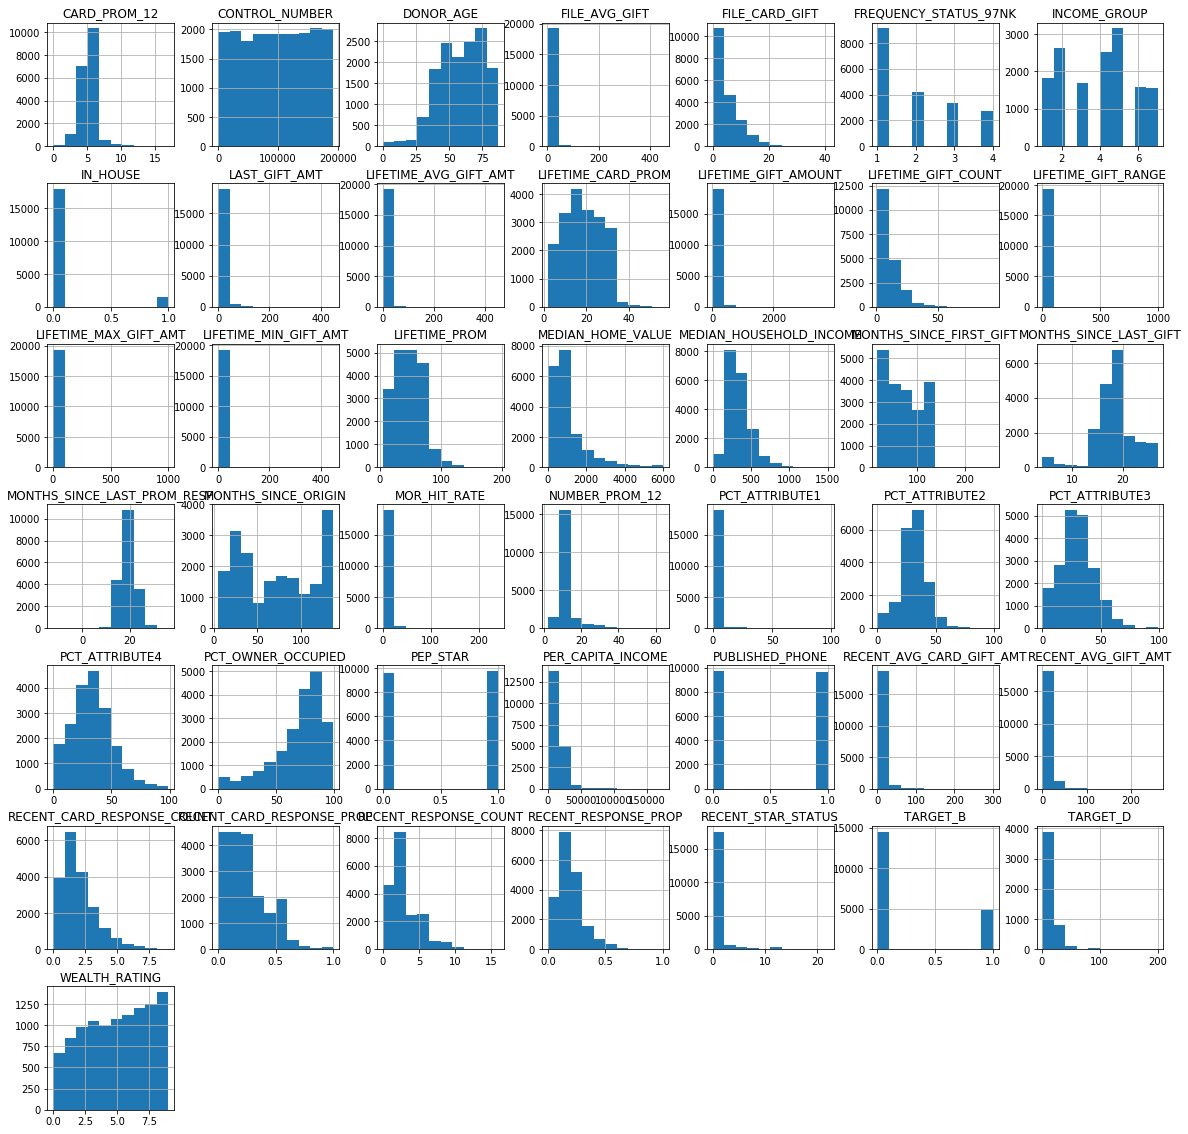

In [5]:
#Each attribute to the class attribute.
data.hist(figsize=(20,20))
plt.show()

# Exploratory Data Analysis

In [6]:
#rename TARGET_B AS Donated
data.rename(columns={'TARGET_B':'Donated'}, inplace=True)

0    14529
1     4843
Name: Donated, dtype: int64

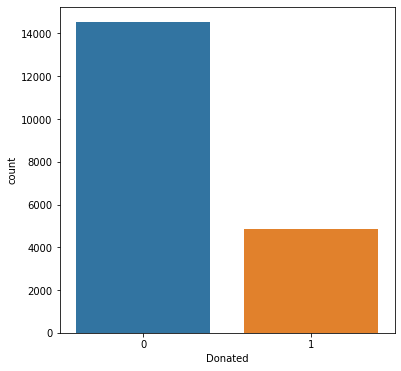

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x='Donated', data=data)

data['Donated'].value_counts()
# From the data, we can see that non-donors outnumber actual donors at almost 3 to 1
# From here we can see the amount of non-donors to donors in our dataset

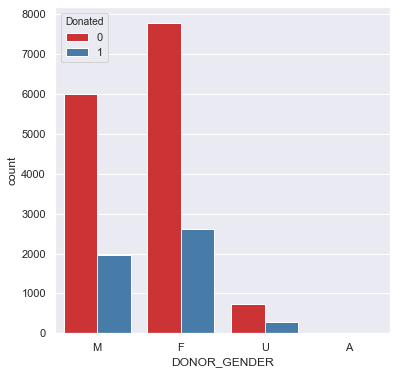

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='DONOR_GENDER',
              hue='Donated',
              data=data,
             palette='Set1')
plt.show()
# This graph shows us that a significant portion of the male and females fall as non-donors

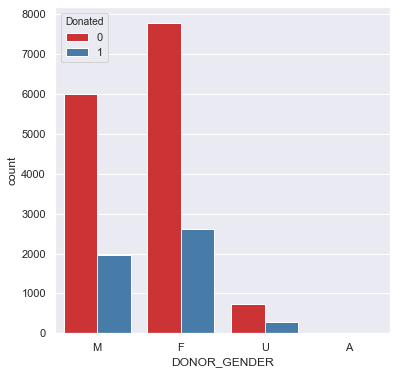

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='DONOR_GENDER',
              hue='Donated',
              data=data,
             palette='Set1')
plt.show()
# This graph shows us that a significant portion of the male and females fall as non-donors

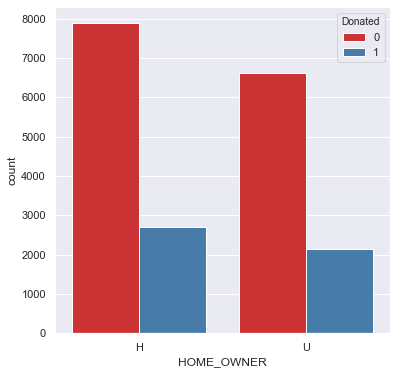

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='HOME_OWNER',
              hue='Donated',
              data=data,
             palette='Set1')
plt.show()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

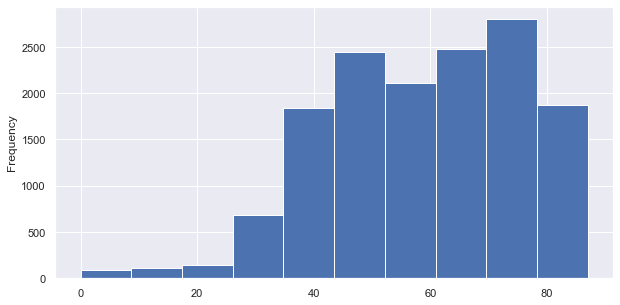

In [11]:
data['DONOR_AGE'].plot.hist(figsize=(10,5))
# This shows us that most of the donors fall betweeen the ages pf 40 - 80 
# This gives us valuable information o who to target based on age

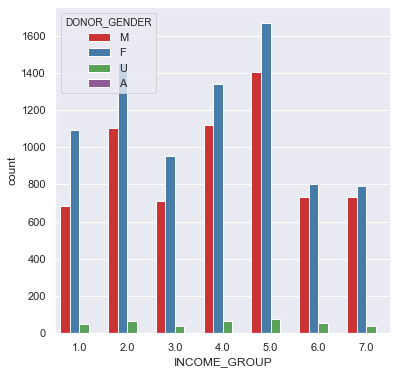

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='INCOME_GROUP',
              hue='DONOR_GENDER',
              data=data,
             palette='Set1')
plt.show()
# This graph shows us that across all income groups,females out earn the men. They will also make for a group to target

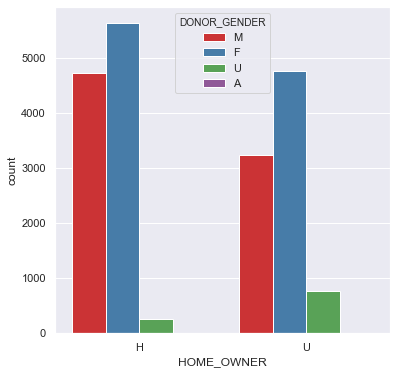

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='HOME_OWNER',
              hue='DONOR_GENDER',
              data=data,
             palette='Set1')
plt.show()
# We also found out that on average females own more homes than men

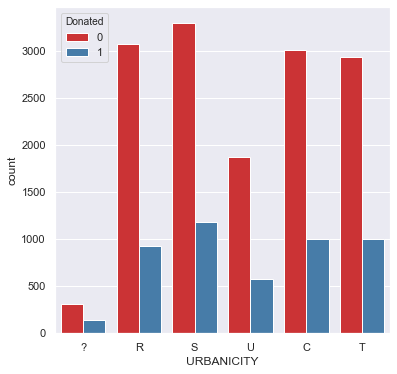

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='URBANICITY',
              hue='Donated',
              data=data,
             palette='Set1')
plt.show()
# We found out that the people most likely to donate live in suburban areas. 
# This makes sense as most of this demographic fall between the older age brackets as seen before when we checked age of donors

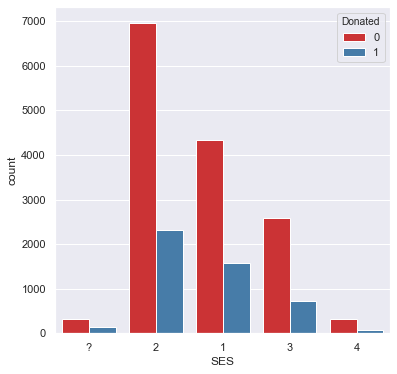

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='SES',
              hue='Donated',
              data=data,
             palette='Set1')
plt.show()
# This shows that most of the people likely to donate fall intot he second social economic status bracket

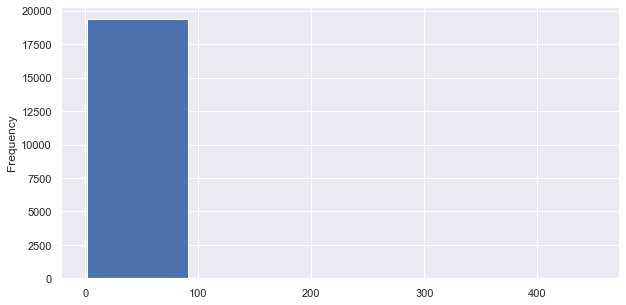

In [16]:
data['LIFETIME_AVG_GIFT_AMT'].plot.hist(bins=5, figsize=(10,5))
# This metric is to show us the overall gift amount from donors. From the graph we can see the that this amount is close to a 100

# Imputing Missing Data

In [17]:
data.isnull().sum()

Donated                            0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

#the columns with missing data are
DONOR_AGE
INCOME_GROUP
WEALTH_RATING
MONTHS_SINCE_LAST_PROM_RESP

In [18]:
# I'm dropping these two columns as they aren't needed for the work going forward
data.drop(['TARGET_D'], axis=1, inplace=True)

In [19]:
data.head()

,Donated,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.0,0,?,?,.,H,M,2.0,0,P,0,NaN,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,R,2,45,H,M,7.0,0,P,0,3.0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,S,1,11,H,F,5.0,0,P,0,9.0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,NaN,0,U,2,04,H,F,6.0,1,B,0,4.0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,R,2,49,U,F,2.0,1,B,8,5.0,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


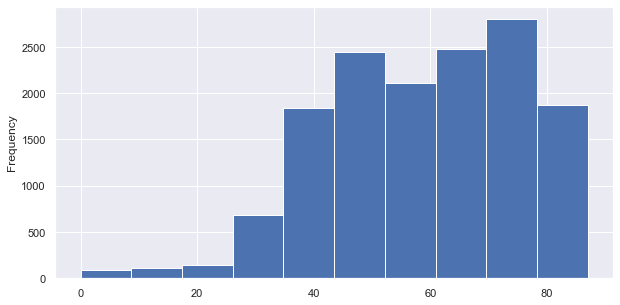

In [20]:
data['DONOR_AGE'].plot.hist(figsize=(10,5))

- the data is left-skewed.
- employ median to fill in missing data

In [21]:
# Replace using median
median = data['DONOR_AGE'].median()

In [22]:
data['DONOR_AGE'].fillna(median, inplace=True)

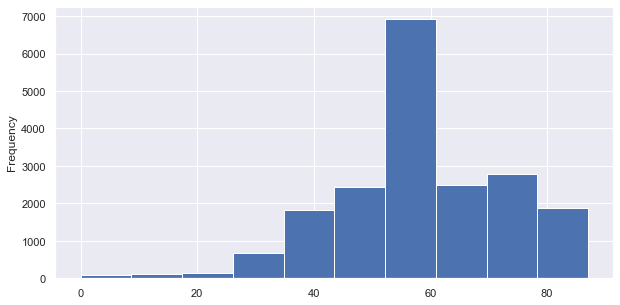

In [23]:
data['DONOR_AGE'].plot.hist(figsize=(10,5))

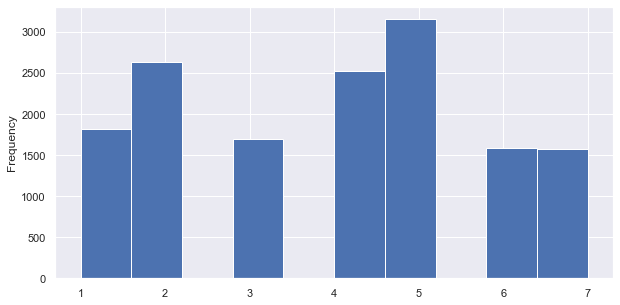

In [24]:
data['INCOME_GROUP'].plot.hist(figsize=(10,5))

- employ mode for categorical data

In [25]:
data['INCOME_GROUP']= data['INCOME_GROUP'].fillna(data['INCOME_GROUP'].mode().iloc[0])

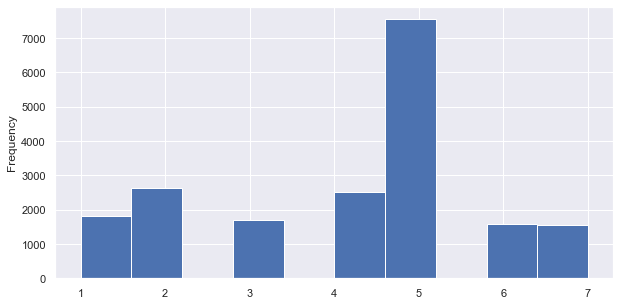

In [26]:
data['INCOME_GROUP'].plot.hist(figsize=(10,5))

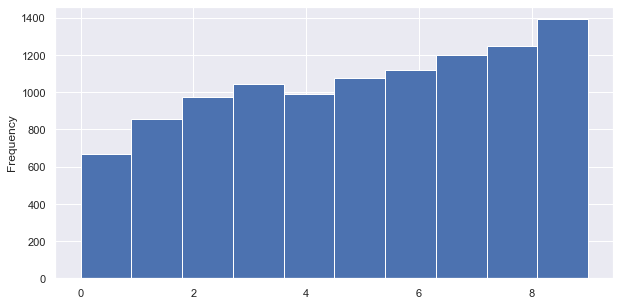

In [27]:
data['WEALTH_RATING'].plot.hist(figsize=(10,5))

- EMPLOY MEDIAN AS THE DATA IS SKEWED (TO THE LEFT)

In [28]:
# Replace using median
median = data['WEALTH_RATING'].median()

In [29]:
data['WEALTH_RATING'].fillna(median, inplace=True)

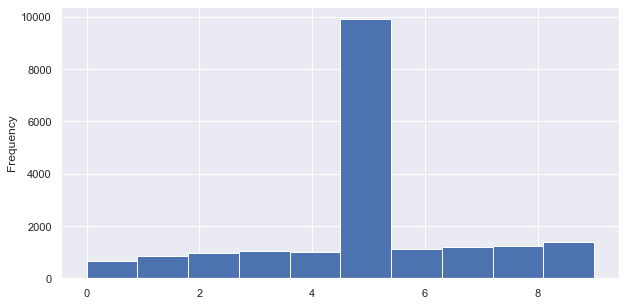

In [30]:
data['WEALTH_RATING'].plot.hist(figsize=(10,5))

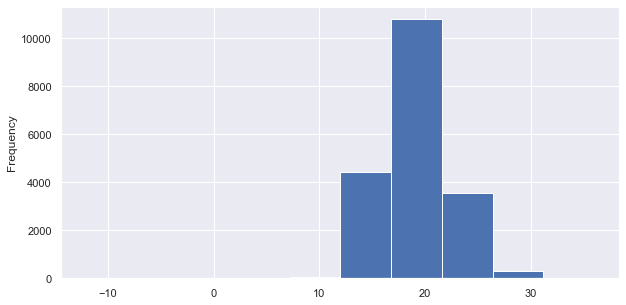

In [31]:
data['MONTHS_SINCE_LAST_PROM_RESP'].plot.hist(figsize=(10,5))

- from the distribution, we will employ to mean to fill in missing data

In [32]:
data['MONTHS_SINCE_LAST_PROM_RESP']= data['MONTHS_SINCE_LAST_PROM_RESP'].fillna(data['MONTHS_SINCE_LAST_PROM_RESP'].mean())

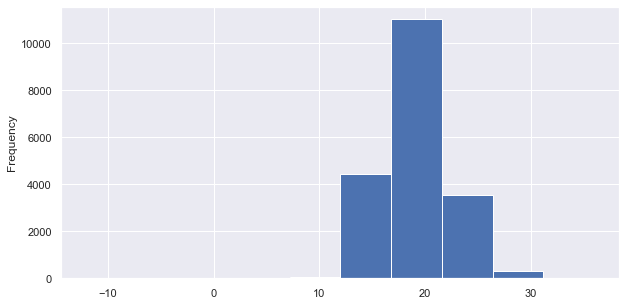

In [33]:
data['MONTHS_SINCE_LAST_PROM_RESP'].plot.hist(figsize=(10,5))

In [34]:
#check again to see if there are still any missing values
data.isnull().sum()

Donated                        0
CONTROL_NUMBER                 0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
DONOR_GENDER                   0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG

# It is important to check for the data types in your dataset

- if the data type is that ofan object or a timestamp for example, it will affect your code when you want to run models

In [35]:
data.dtypes

Donated                          int64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                      object
SES                             object
CLUSTER_CODE                    object
HOME_OWNER                      object
DONOR_GENDER                    object
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
OVERLAY_SOURCE                  object
MOR_HIT_RATE                     int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PER_CAPITA_INCOME                int64
PCT_ATTRIBUTE1                   int64
PCT_ATTRIBUTE2                   int64
PCT_ATTRIBUTE3                   int64
PCT_ATTRIBUTE4                   int64
PEP_STAR                         int64
RECENT_STAR_STATUS               int64
RECENCY_STATUS_96NK      

# Dealing with miscellaneous data

#### Despite the fact that there are no "missing" values, there are some misellaneous values in the data set like '?' and   ' .'
#### We will deal with them now

In [36]:
data.head()

,Donated,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.0,0,?,?,.,H,M,2.0,0,P,0,5.0,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,R,2,45,H,M,7.0,0,P,0,3.0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,S,1,11,H,F,5.0,0,P,0,9.0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,60.0,0,U,2,04,H,F,6.0,1,B,0,4.0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,R,2,49,U,F,2.0,1,B,8,5.0,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


### SES, URBANICITY and CLUSTER_CODE seem to all have miscellaneous data

In [37]:
data = data.replace("?",np.nan)

In [38]:
data['CLUSTER_CODE'] = data.CLUSTER_CODE.replace(' .',0)

In [39]:
#CHECK DATA TO SEE IF COLUMNS ARE CLEANED
data.head()

,Donated,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.0,0,NaN,NaN,0,H,M,2.0,0,P,0,5.0,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,R,2,45,H,M,7.0,0,P,0,3.0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,S,1,11,H,F,5.0,0,P,0,9.0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,60.0,0,U,2,04,H,F,6.0,1,B,0,4.0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,R,2,49,U,F,2.0,1,B,8,5.0,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [40]:
data.isnull().sum()

Donated                          0
CONTROL_NUMBER                   0
MONTHS_SINCE_ORIGIN              0
DONOR_AGE                        0
IN_HOUSE                         0
URBANICITY                     454
SES                            454
CLUSTER_CODE                     0
HOME_OWNER                       0
DONOR_GENDER                     0
INCOME_GROUP                     0
PUBLISHED_PHONE                  0
OVERLAY_SOURCE                   0
MOR_HIT_RATE                     0
WEALTH_RATING                    0
MEDIAN_HOME_VALUE                0
MEDIAN_HOUSEHOLD_INCOME          0
PCT_OWNER_OCCUPIED               0
PER_CAPITA_INCOME                0
PCT_ATTRIBUTE1                   0
PCT_ATTRIBUTE2                   0
PCT_ATTRIBUTE3                   0
PCT_ATTRIBUTE4                   0
PEP_STAR                         0
RECENT_STAR_STATUS               0
RECENCY_STATUS_96NK              0
FREQUENCY_STATUS_97NK            0
RECENT_RESPONSE_PROP             0
RECENT_AVG_GIFT_AMT 

- data seems to be cleaned for SES and URBANICITY column but not CLUSTER_CODE column. 
- Let's deal with the first two column first

- we can't plot to see the distribution of urbanicity because it is categorical data

In [41]:
#we wil handle the missing data using mode
data['URBANICITY']= data['URBANICITY'].fillna(data['URBANICITY'].mode().iloc[0])
data['SES']= data['SES'].fillna(data['SES'].mode().iloc[0])

In [42]:
data.dtypes

Donated                          int64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                      object
SES                             object
CLUSTER_CODE                    object
HOME_OWNER                      object
DONOR_GENDER                    object
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
OVERLAY_SOURCE                  object
MOR_HIT_RATE                     int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PER_CAPITA_INCOME                int64
PCT_ATTRIBUTE1                   int64
PCT_ATTRIBUTE2                   int64
PCT_ATTRIBUTE3                   int64
PCT_ATTRIBUTE4                   int64
PEP_STAR                         int64
RECENT_STAR_STATUS               int64
RECENCY_STATUS_96NK      

In [43]:
data.head()

,Donated,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.0,0,S,2,0,H,M,2.0,0,P,0,5.0,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,R,2,45,H,M,7.0,0,P,0,3.0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,S,1,11,H,F,5.0,0,P,0,9.0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,60.0,0,U,2,04,H,F,6.0,1,B,0,4.0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,R,2,49,U,F,2.0,1,B,8,5.0,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


- so we use label encoding to handle categorical data

# Handling Categorical Data

In [44]:
# start with URBANICITY. 
data['URBANICITY'] = data['URBANICITY'].astype('category')
#I change the data type to category so I can use cat.codes on the URBANICITY column

In [45]:
data['URBANICITY'] = data['URBANICITY'].cat.codes
# here I use label encoding to handle the categorical data that is the column URBANICITY

In [46]:
#DO THE SAME FOR OVERLAY_SOURCE
data['OVERLAY_SOURCE'] = data['OVERLAY_SOURCE'].astype('category')
data['OVERLAY_SOURCE'] = data['OVERLAY_SOURCE'].cat.codes

In [47]:
data.head()

,Donated,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.0,0,2,2,0,H,M,2.0,0,3,0,5.0,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,1,2,45,H,M,7.0,0,3,0,3.0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,2,1,11,H,F,5.0,0,3,0,9.0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,60.0,0,4,2,04,H,F,6.0,1,0,0,4.0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,1,2,49,U,F,2.0,1,0,8,5.0,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [48]:
#DO THE SAME FOR HOME_OWNER
data['HOME_OWNER'] = data['HOME_OWNER'].astype('category')
data['HOME_OWNER'] = data['HOME_OWNER'].cat.codes

In [49]:
#DO FOR RECENECY_STATUS_96NK
data['RECENCY_STATUS_96NK'] = data['RECENCY_STATUS_96NK'].astype('category')
data['RECENCY_STATUS_96NK'] = data['RECENCY_STATUS_96NK'].cat.codes

In [50]:
data = pd.get_dummies(data, columns=['DONOR_GENDER', ], prefix = ['DONOR_GENDER'])

In [51]:
data.drop(['DONOR_GENDER_A','DONOR_GENDER_U'],axis=1, inplace=True)

In [52]:
data.head()

,Donated,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT,DONOR_GENDER_F,DONOR_GENDER_M
0,0,5,101,87.0,0,2,2,0,0,2.0,0,3,0,5.0,554,294,76,11855,0,0,0,0,1,0,0,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7,0,1
1,1,12,137,79.0,0,1,2,45,0,7.0,0,3,0,3.0,334,212,72,10385,0,41,21,31,1,1,5,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12,0,1
2,0,37,113,75.0,0,2,1,11,0,5.0,0,3,0,9.0,2388,405,63,30855,0,25,26,57,1,1,5,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16,1,0
3,0,38,92,60.0,0,4,2,04,0,6.0,1,0,0,4.0,1688,153,3,16342,0,25,32,42,1,0,0,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12,1,0
4,0,41,101,74.0,0,1,2,49,1,2.0,1,0,8,5.0,514,328,90,12107,0,33,36,37,0,0,0,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3,1,0


In [53]:
data.dtypes
#data['CLUSTER_CODE']=data.CLUSTER_CODE.replace(' .',0)

Donated                          int64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                        int8
SES                             object
CLUSTER_CODE                    object
HOME_OWNER                        int8
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
OVERLAY_SOURCE                    int8
MOR_HIT_RATE                     int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PER_CAPITA_INCOME                int64
PCT_ATTRIBUTE1                   int64
PCT_ATTRIBUTE2                   int64
PCT_ATTRIBUTE3                   int64
PCT_ATTRIBUTE4                   int64
PEP_STAR                         int64
RECENT_STAR_STATUS               int64
RECENCY_STATUS_96NK               int8
FREQUENCY_STATUS_97NK    

In [54]:
data['CLUSTER_CODE']= data['CLUSTER_CODE'].fillna(data['CLUSTER_CODE'].mode().iloc[0])

In [55]:
# change the CLUSTER_CODE data format to numeric before feature selection
data['CLUSTER_CODE'] = pd.to_numeric(data['CLUSTER_CODE'], errors='coerce')

In [56]:
data.isnull().sum()

Donated                        0
CONTROL_NUMBER                 0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG_CARD_GIFT_AMT       0
RECENT_RES

# Feature Selection

In [57]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = data.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    data[i] = d[i].transform(data[i].fillna('NA'))

In [58]:
features = data[data.columns.difference(['Donated'])]
labels = data['Donated']

In [59]:
features = features.fillna(0)

## Variable Selection

### Weight of Evidence and Information Value

In [60]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [61]:
final_iv, IV = data_vars(data[data.columns.difference(['Donated'])],data.Donated)

In [62]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
43,RECENT_RESPONSE_COUNT,0.090920
8,FREQUENCY_STATUS_97NK,0.077015
41,RECENT_CARD_RESPONSE_COUNT,0.076266
44,RECENT_RESPONSE_PROP,0.075305
6,FILE_AVG_GIFT,0.068246
13,LIFETIME_AVG_GIFT_AMT,0.068246
12,LAST_GIFT_AMT,0.066563
7,FILE_CARD_GIFT,0.066285
16,LIFETIME_GIFT_COUNT,0.064998
40,RECENT_AVG_GIFT_AMT,0.062091


### Apply WOE values to your dataframe columns

The below code snippet can be used to apply the WOE values to your dataframe columns. 

In [63]:
transform_vars_list = data.columns.difference(['Donated'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [64]:
transform_vars_list

Index(['CARD_PROM_12', 'CLUSTER_CODE', 'CONTROL_NUMBER', 'DONOR_AGE',
       'DONOR_GENDER_F', 'DONOR_GENDER_M', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT',
       'FREQUENCY_STATUS_97NK', 'HOME_OWNER', 'INCOME_GROUP', 'IN_HOUSE',
       'LAST_GIFT_AMT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_CARD_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LIFETIME_PROM',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME',
       'MONTHS_SINCE_FIRST_GIFT', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'MONTHS_SINCE_ORIGIN', 'MOR_HIT_RATE',
       'NUMBER_PROM_12', 'OVERLAY_SOURCE', 'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2',
       'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PCT_OWNER_OCCUPIED', 'PEP_STAR',
       'PER_CAPITA_INCOME', 'PUBLISHED_PHONE', 'RECENCY_STATUS_96NK',
       'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_PROP',
       'RECENT

In [65]:
for var in transform_vars_list:
    small_data = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_data.MAX_VALUE,small_data.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            data[transform_prefix + var] = data[var].apply(lambda x: eval(replace_cmd))
        except:
            data[transform_prefix + var] = data[var].apply(lambda x: eval(replace_cmd1))

### Variable Importance

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

1.0


In [67]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [68]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
2,CONTROL_NUMBER,0.044200
21,MEDIAN_HOME_VALUE,0.042184
36,PER_CAPITA_INCOME,0.040020
22,MEDIAN_HOUSEHOLD_INCOME,0.038775
33,PCT_ATTRIBUTE4,0.034877
34,PCT_OWNER_OCCUPIED,0.034424
31,PCT_ATTRIBUTE2,0.033880
32,PCT_ATTRIBUTE3,0.033549
3,DONOR_AGE,0.032945
15,LIFETIME_GIFT_AMOUNT,0.030892


### Recursive Feature Elimination

In [69]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [70]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [71]:
Selected[Selected['RFE'] == True]

,index,RFE
0,CARD_PROM_12,True
4,DONOR_GENDER_F,True
5,DONOR_GENDER_M,True
8,FREQUENCY_STATUS_97NK,True
9,HOME_OWNER,True
10,INCOME_GROUP,True
11,IN_HOUSE,True
14,LIFETIME_CARD_PROM,True
20,LIFETIME_PROM,True
24,MONTHS_SINCE_LAST_GIFT,True


### Variable Importance - Extratrees Classifier

In [72]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.01949538 0.02448411 0.0275307  0.02563765 0.01348946 0.01319393
 0.02161101 0.02121837 0.019053   0.01489311 0.02314839 0.0060028
 0.02075722 0.02139662 0.0223374  0.02155311 0.02089402 0.02052738
 0.02012659 0.02064128 0.0233705  0.02617312 0.02484676 0.02285729
 0.02524897 0.02297625 0.02021333 0.01940381 0.02372395 0.01912185
 0.01838568 0.02536149 0.02525154 0.02583312 0.02576287 0.00891911
 0.02526082 0.01549522 0.01048594 0.01942868 0.02118572 0.01862444
 0.02269001 0.02021581 0.02476904 0.00812261 0.01796662 0.02146569
 0.01884819]


In [73]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [74]:
FI = FI.reset_index()

In [75]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
2,CONTROL_NUMBER,0.027531
21,MEDIAN_HOME_VALUE,0.026173
33,PCT_ATTRIBUTE4,0.025833
34,PCT_OWNER_OCCUPIED,0.025763
3,DONOR_AGE,0.025638
31,PCT_ATTRIBUTE2,0.025361
36,PER_CAPITA_INCOME,0.025261
32,PCT_ATTRIBUTE3,0.025252
24,MONTHS_SINCE_LAST_GIFT,0.025249
22,MEDIAN_HOUSEHOLD_INCOME,0.024847


# CHI-SQUARE

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [77]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [78]:
chi_sq = chi_sq.reset_index()

In [79]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
2,CONTROL_NUMBER,378676.84
36,PER_CAPITA_INCOME,159846.83
21,MEDIAN_HOME_VALUE,42021.80
15,LIFETIME_GIFT_AMOUNT,3549.90
22,MEDIAN_HOUSEHOLD_INCOME,2227.72
26,MONTHS_SINCE_ORIGIN,1770.96
23,MONTHS_SINCE_FIRST_GIFT,1740.78
16,LIFETIME_GIFT_COUNT,1465.68
20,LIFETIME_PROM,987.28
7,FILE_CARD_GIFT,868.61


## L1 Feature Selection

In [80]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [81]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()

In [82]:
l1[l1['L1'] == True]

,index,L1
0,CARD_PROM_12,True
1,CLUSTER_CODE,True
3,DONOR_AGE,True
6,FILE_AVG_GIFT,True
8,FREQUENCY_STATUS_97NK,True
9,HOME_OWNER,True
10,INCOME_GROUP,True
11,IN_HOUSE,True
12,LAST_GIFT_AMT,True
14,LIFETIME_CARD_PROM,True


# COMBINE ALL TOGETHER

In [83]:
from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

## Vote each variable

In [84]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [85]:
score_table['final_score'] = score_table.sum(axis=1)

In [86]:
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
21,MEDIAN_HOME_VALUE,0,1,1,1,0,1,4
2,CONTROL_NUMBER,0,1,1,1,0,0,3
22,MEDIAN_HOUSEHOLD_INCOME,0,1,0,1,0,1,3
41,RECENT_CARD_RESPONSE_COUNT,1,0,0,0,1,1,3
33,PCT_ATTRIBUTE4,0,1,1,0,0,1,3
8,FREQUENCY_STATUS_97NK,1,0,0,0,1,1,3
35,PEP_STAR,0,0,0,0,1,1,2
28,NUMBER_PROM_12,0,0,0,0,1,1,2
29,OVERLAY_SOURCE,0,0,0,0,1,1,2
34,PCT_OWNER_OCCUPIED,0,0,1,0,0,1,2


## Multicollinearity

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [89]:
features = features[list(score_table[score_table['final_score'] >= 2]['index'])]

In [90]:
features.dtypes

CARD_PROM_12                    int64
CONTROL_NUMBER                  int64
DONOR_AGE                     float64
FILE_AVG_GIFT                 float64
FREQUENCY_STATUS_97NK           int64
HOME_OWNER                       int8
INCOME_GROUP                  float64
IN_HOUSE                        int64
LIFETIME_CARD_PROM              int64
LIFETIME_PROM                   int64
MEDIAN_HOME_VALUE               int64
MEDIAN_HOUSEHOLD_INCOME         int64
MONTHS_SINCE_LAST_GIFT          int64
NUMBER_PROM_12                  int64
OVERLAY_SOURCE                   int8
PCT_ATTRIBUTE4                  int64
PCT_OWNER_OCCUPIED              int64
PEP_STAR                        int64
PER_CAPITA_INCOME               int64
PUBLISHED_PHONE                 int64
RECENT_AVG_GIFT_AMT           float64
RECENT_CARD_RESPONSE_COUNT      int64
RECENT_RESPONSE_COUNT           int64
RECENT_STAR_STATUS              int64
SES                             int64
dtype: object

In [91]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [92]:
list(vif['Features'])

['CONTROL_NUMBER',
 'FILE_AVG_GIFT',
 'FREQUENCY_STATUS_97NK',
 'HOME_OWNER',
 'INCOME_GROUP',
 'IN_HOUSE',
 'LIFETIME_CARD_PROM',
 'MEDIAN_HOME_VALUE',
 'OVERLAY_SOURCE',
 'PCT_ATTRIBUTE4',
 'PCT_OWNER_OCCUPIED',
 'PEP_STAR',
 'PUBLISHED_PHONE',
 'RECENT_AVG_GIFT_AMT',
 'RECENT_CARD_RESPONSE_COUNT',
 'RECENT_STAR_STATUS',
 'SES']

In [93]:
features.describe()

,CONTROL_NUMBER,FILE_AVG_GIFT,FREQUENCY_STATUS_97NK,HOME_OWNER,INCOME_GROUP,IN_HOUSE,LIFETIME_CARD_PROM,MEDIAN_HOME_VALUE,OVERLAY_SOURCE,PCT_ATTRIBUTE4,PCT_OWNER_OCCUPIED,PEP_STAR,PUBLISHED_PHONE,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,RECENT_STAR_STATUS,SES
count,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00
mean,96546.23,12.86,1.98,0.45,4.16,0.07,18.67,1079.87,1.27,32.85,69.70,0.50,0.50,15.37,1.73,0.93,0.91
std,55830.64,8.79,1.10,0.50,1.70,0.26,8.56,960.75,1.26,17.84,21.71,0.50,0.50,10.17,1.54,2.55,0.74
min,5.00,1.36,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48289.00,8.00,1.00,0.00,3.00,0.00,11.00,518.00,0.00,21.00,60.00,0.00,0.00,10.00,1.00,0.00,0.00
50%,96937.00,11.20,2.00,0.00,5.00,0.00,18.00,747.00,1.00,32.00,76.00,1.00,0.00,14.00,1.00,0.00,1.00
75%,145429.50,15.00,3.00,1.00,5.00,0.00,26.00,1227.00,2.00,43.00,85.00,1.00,1.00,20.00,2.00,1.00,1.00
max,191779.00,450.00,4.00,1.00,7.00,1.00,56.00,6000.00,3.00,99.00,99.00,1.00,1.00,260.00,9.00,22.00,3.00


In [94]:
features.head()

,CONTROL_NUMBER,FILE_AVG_GIFT,FREQUENCY_STATUS_97NK,HOME_OWNER,INCOME_GROUP,IN_HOUSE,LIFETIME_CARD_PROM,MEDIAN_HOME_VALUE,OVERLAY_SOURCE,PCT_ATTRIBUTE4,PCT_OWNER_OCCUPIED,PEP_STAR,PUBLISHED_PHONE,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,RECENT_STAR_STATUS,SES
0,5,8.49,1,0,2.00,0,19,554,3,0,76,1,0,15.00,0,0,1
1,12,14.72,2,0,7.00,0,32,334,3,31,72,1,0,15.00,2,1,1
2,37,16.75,3,0,5.00,0,44,2388,3,57,63,1,0,21.67,6,1,0
3,38,11.76,3,0,6.00,0,31,1688,0,42,3,1,1,13.44,4,0,1
4,41,8.83,1,1,2.00,0,30,514,0,37,90,0,1,17.50,1,0,1


In [95]:
#Merge the best list to churn variable
final_vars = list(vif['Features']) + ['Donated']

In [96]:
df1 = data[final_vars].fillna(0)

In [97]:
df1.describe()

,CONTROL_NUMBER,FILE_AVG_GIFT,FREQUENCY_STATUS_97NK,HOME_OWNER,INCOME_GROUP,IN_HOUSE,LIFETIME_CARD_PROM,MEDIAN_HOME_VALUE,OVERLAY_SOURCE,PCT_ATTRIBUTE4,PCT_OWNER_OCCUPIED,PEP_STAR,PUBLISHED_PHONE,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,RECENT_STAR_STATUS,SES,Donated
count,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00,19372.00
mean,96546.23,12.86,1.98,0.45,4.16,0.07,18.67,1079.87,1.27,32.85,69.70,0.50,0.50,15.37,1.73,0.93,0.91,0.25
std,55830.64,8.79,1.10,0.50,1.70,0.26,8.56,960.75,1.26,17.84,21.71,0.50,0.50,10.17,1.54,2.55,0.74,0.43
min,5.00,1.36,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48289.00,8.00,1.00,0.00,3.00,0.00,11.00,518.00,0.00,21.00,60.00,0.00,0.00,10.00,1.00,0.00,0.00,0.00
50%,96937.00,11.20,2.00,0.00,5.00,0.00,18.00,747.00,1.00,32.00,76.00,1.00,0.00,14.00,1.00,0.00,1.00,0.00
75%,145429.50,15.00,3.00,1.00,5.00,0.00,26.00,1227.00,2.00,43.00,85.00,1.00,1.00,20.00,2.00,1.00,1.00,0.25
max,191779.00,450.00,4.00,1.00,7.00,1.00,56.00,6000.00,3.00,99.00,99.00,1.00,1.00,260.00,9.00,22.00,3.00,1.00


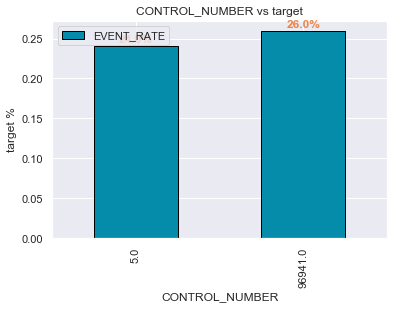

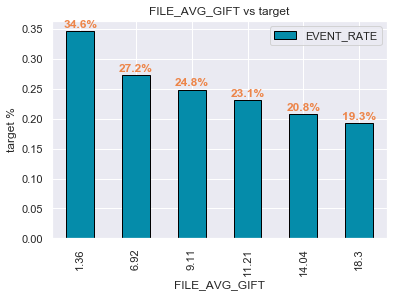

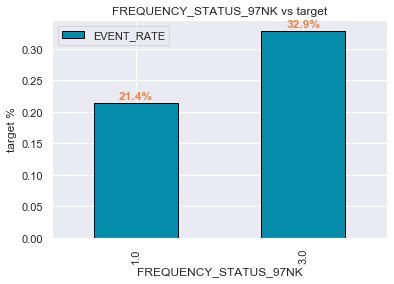

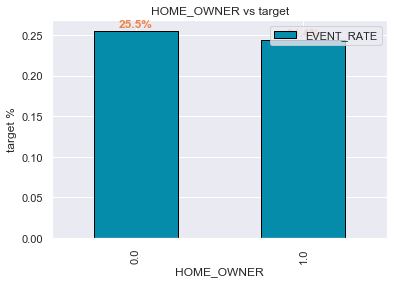

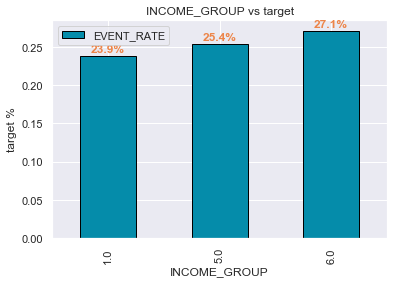

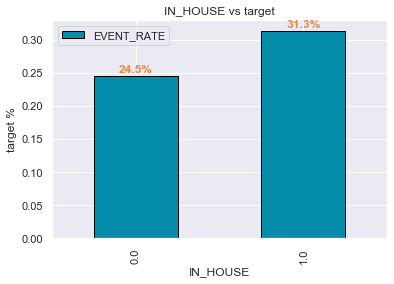

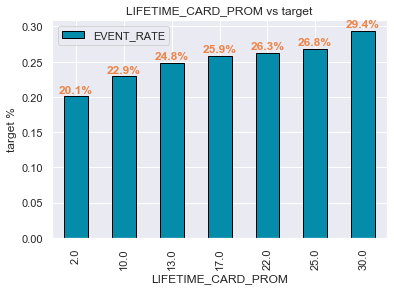

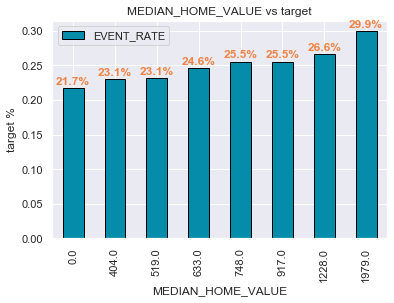

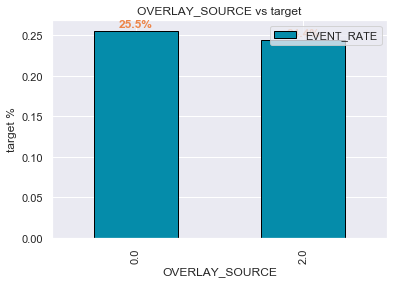

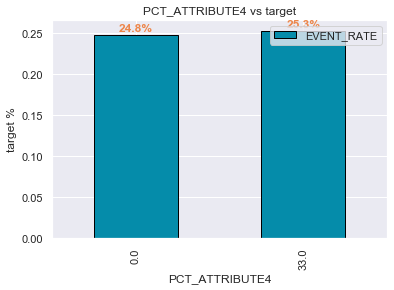

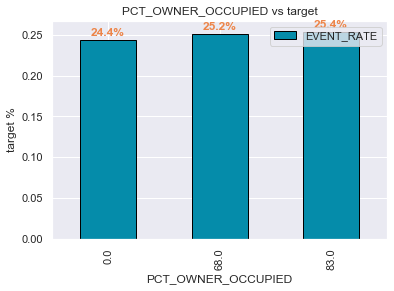

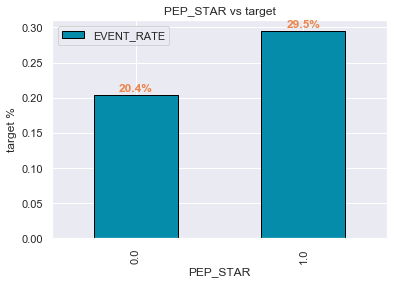

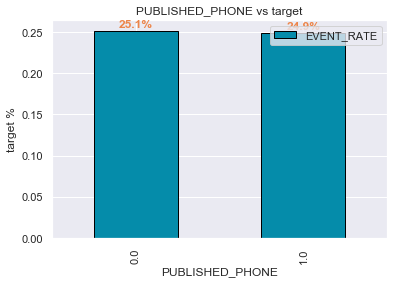

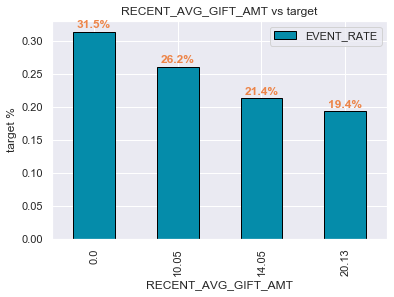

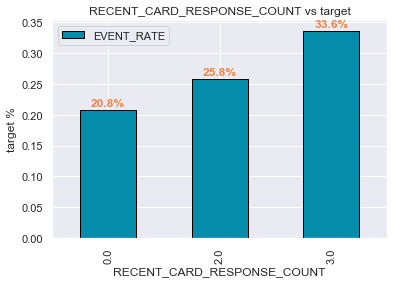

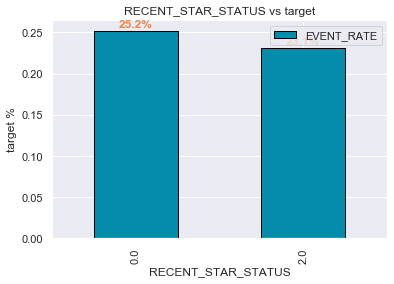

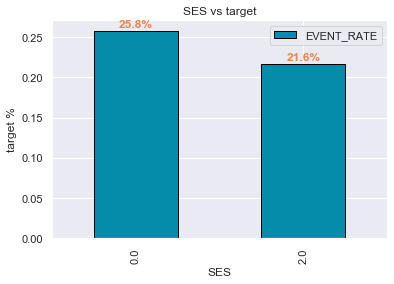

In [98]:
bar_color = '#058caa'
num_color = '#ed8549'

final_iv,_ = data_vars(df1,df1['Donated'])
final_iv = final_iv[(final_iv.VAR_NAME != 'Donated')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('target'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('target') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

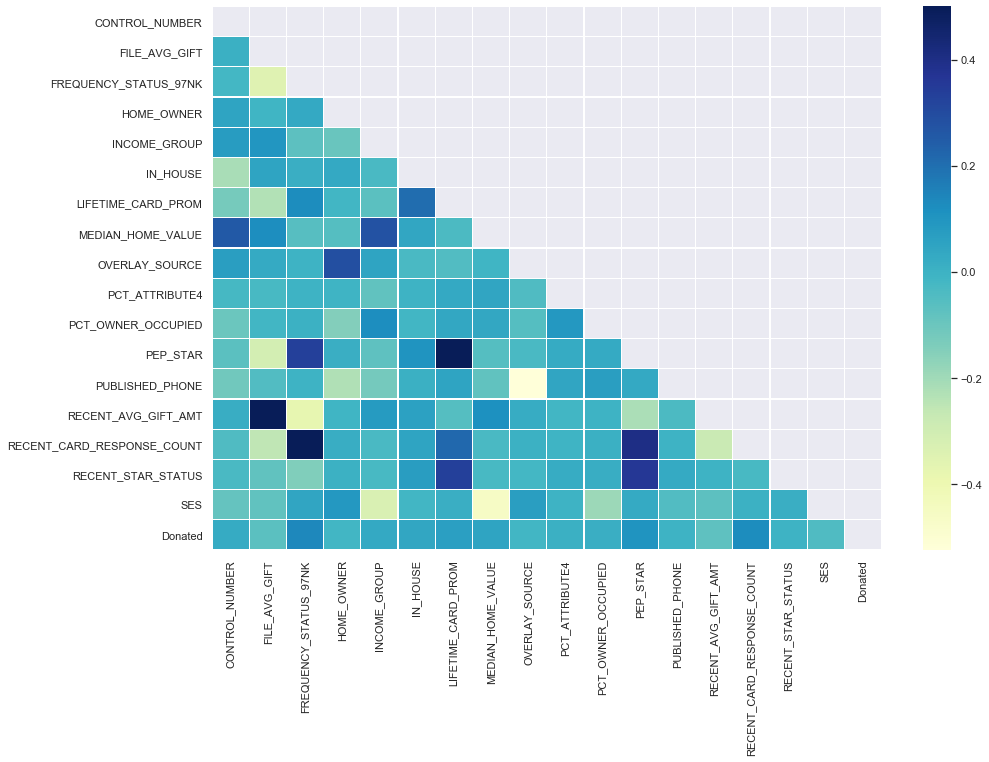

In [99]:
# Calculate correlations
corr = df1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

## CROSS VALIDATION

In [100]:
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size=0.2, random_state=20)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[list(vif['Features'])]
label_train = train['Donated']
features_test = test[list(vif['Features'])]
label_test = test['Donated']

In [101]:
#implement cross validation, the cross_val_score method of the sklearn.model_selection library can be used. 
from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=300, random_state=20) 

In [102]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=classifier, X=features_train, y=label_train, cv=10) 

In [103]:
print(all_accuracies) 

[0.74774194 0.74774194 0.74774194 0.74967742 0.74903226 0.74709677
 0.75225806 0.74757908 0.74822466 0.74951582]


In [104]:
#find the average of all the accuracies, simple use the mean() method of the object returned by cross_val_score
print(all_accuracies.mean()) 

0.7486609883587747


In [105]:
#Finally let's find the standard deviation of the data to see degree of variance in the results obtained by our model. To do so, call the std() method on the all_accuracies object
print(all_accuracies.std()) 

0.0014554141019246928


## Let's Try Cross Validation using Logistic Regression 

In [106]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [107]:
all_accuracies = cross_val_score(estimator=clf, X=features_train, y=label_train, cv=10)  

In [108]:
print(all_accuracies) 

[0.7483871  0.74967742 0.74967742 0.74967742 0.74967742 0.74967742
 0.75096774 0.74951582 0.75080697 0.75016139]


In [109]:
#find the average of all the accuracies, simple use the mean() method of the object returned by cross_val_score
print(all_accuracies.mean()) 

0.7498226118827963


In [110]:
#Finally let's find the standard deviation of the data to see degree of variance in the results obtained by our model. To do so, call the std() method on the all_accuracies object
print(all_accuracies.std()) 

0.0006822970809227303


## Grid Search for Parameter Selection
instead of randomly selecting the values of the parameters, a better approach would be to develop an algorithm which automatically finds the best parameters for a particular model. Grid Search is one such algorithm.

In [111]:
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
grid_param = {  
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [112]:
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [113]:
#Once the GridSearchCV class is initialized, the last step is to call the fit method of the class and pass it the training and 
#test set, as shown in the following code:
gd_sr.fit(features_train, label_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=20,
                                 

In [114]:
#the next step is to check the parameters that return the highest accuracy
best_parameters = gd_sr.best_params_  
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}


In [115]:
#To find the best accuracy achieved, execute the following code:
best_result = gd_sr.best_score_  
print(best_result)

0.7480803431974843


# Model Assessment & Selection

In [116]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size = 0.2)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[list(vif['Features'])]
label_train = train['Donated']
features_test = test[list(vif['Features'])]
label_test = test['Donated']

In [117]:
all_features = pd.concat([features_train, features_test])
all_labels = pd.concat([label_train, label_test])

In [119]:
## Random Forest
random_forest = RandomForestClassifier(n_estimators=70)
random_forest.fit(features_train, label_train)

y_prediction = random_forest.predict(features_test)

random_forest.score(features_train, label_train)
acc_random_forest = round(random_forest.score(features_train, label_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [120]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(features_train, label_train)

y_pred = logreg.predict(features_test)

acc_log = round(logreg.score(features_train, label_train) * 100, 2)
print(round(acc_log,2,), "%")

75.05 %


In [121]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(features_train, label_train)

y_pred = knn.predict(features_test)

acc_knn = round(knn.score(features_train, label_train) * 100, 2)
print(round(acc_knn,2,), "%")

81.37 %


In [122]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(features_train, label_train)

y_pred = gaussian.predict(features_test)

acc_gaussian = round(gaussian.score(features_train, label_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

73.8 %


In [123]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(features_train, label_train)

y_pred = linear_svc.predict(features_test)

acc_linear_svc = round(linear_svc.score(features_train, label_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

74.74 %


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [124]:
# DECISION TREE
decision_tree = DecisionTreeClassifier()
decision_tree.fit(features_train, label_train)

y_pred = decision_tree.predict(features_test)

acc_decision_tree = round(decision_tree.score(features_train, label_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

100.0 %


In [125]:
# MODEL COMPARISON

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
81.37,KNN
75.05,Logistic Regression
74.74,Support Vector Machines
73.80,Naive Bayes
24.95,Stochastic Gradient Decent


In [126]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, features_train, label_train, cv=10, scoring = "accuracy")

In [127]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74774194 0.75032258 0.74387097 0.74387097 0.74451613 0.75225806
 0.75096774 0.73983215 0.75209813 0.75597159]
Mean: 0.7481450259272371
Standard Deviation: 0.004748464797684348


In [128]:
# FEATURE IMPORTANCE

In [129]:
importances = pd.DataFrame({'feature':features_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [130]:
importances.head(15)

,importance
feature,
CONTROL_NUMBER,0.13
MEDIAN_HOME_VALUE,0.12
FILE_AVG_GIFT,0.11
PCT_OWNER_OCCUPIED,0.11
PCT_ATTRIBUTE4,0.10
RECENT_AVG_GIFT_AMT,0.09
LIFETIME_CARD_PROM,0.09
INCOME_GROUP,0.05
RECENT_CARD_RESPONSE_COUNT,0.04


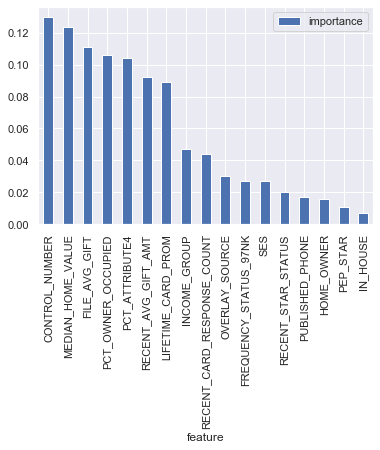

In [131]:
importances.plot.bar()

In [132]:
#Train the final model on all the dataset
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**best_parameters)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)



print(accuracy_train, accuracy_test)

1.0 0.7452903225806452


In [133]:
# Tuning for Random Forest with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(features_train,label_train)
              
print(rf_random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   18.8s finished


{'n_estimators': 227, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 3, 'bootstrap': True}


In [154]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_random.best_params_)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test)

0.7506614183390333 0.7473548387096774


## Save Model for future use

In [155]:
import pandas
from sklearn.externals import joblib

filename = 'final_donor_model.model'
i = [d,clf]
joblib.dump(i,filename)

['final_donor_model.model']

## Score New Data

In [156]:
features.dtypes

CONTROL_NUMBER                  int64
FILE_AVG_GIFT                 float64
FREQUENCY_STATUS_97NK           int64
HOME_OWNER                       int8
INCOME_GROUP                  float64
IN_HOUSE                        int64
LIFETIME_CARD_PROM              int64
MEDIAN_HOME_VALUE               int64
OVERLAY_SOURCE                   int8
PCT_ATTRIBUTE4                  int64
PCT_OWNER_OCCUPIED              int64
PEP_STAR                        int64
PUBLISHED_PHONE                 int64
RECENT_AVG_GIFT_AMT           float64
RECENT_CARD_RESPONSE_COUNT      int64
RECENT_STAR_STATUS              int64
SES                             int64
dtype: object

In [157]:
#Prepare score data to ensure the attributes of the modelling data matches that of the scoring data
#Score_data


data1 = pd.read_csv('/Users/godwin/Desktop/tuesday/challenge-10k/Prospective Donor_ML with Python.csv')


In [158]:
#replace missing values with most frequent values
Score_data_sel = data1.fillna(data1.mode().iloc[0])

In [159]:
Score_data_sel.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,71.00,0,R,2,46,U,F,5.00,0,N,0,9.00,655,219,77,12671,0,46,24,53,0,0,A,1,0.07,21.00,0.00,0.00,1,0,26.00,11,25,103.00,7,14.71,16.00,21.00,5.00,21.00,4,10,26,90,14.71,2
1,142,137,71.00,0,R,2,43,U,F,5.00,1,N,0,1.00,475,227,70,10221,0,30,33,29,1,1,S,2,0.35,10.00,0.50,10.00,7,5,22.00,44,110,186.00,31,6.00,9.00,11.00,2.00,10.00,9,22,22,129,6.00,14
2,282,17,30.00,0,T,1,35,H,M,6.00,1,B,11,9.00,1117,544,87,18212,1,27,70,21,0,0,F,1,0.08,20.00,0.20,20.00,1,1,20.00,13,39,76.00,9,8.44,15.00,20.00,5.00,20.00,5,14,20,87,8.44,1
3,368,137,75.00,0,U,1,02,H,M,6.00,1,B,1,7.00,2257,485,84,17885,0,43,28,41,1,10,A,1,0.33,8.83,0.44,8.75,6,4,19.00,42,114,247.00,38,6.50,5.00,10.00,5.00,10.00,10,24,19,129,6.50,22
4,387,5,71.00,0,T,2,40,U,F,2.00,0,B,0,9.00,789,413,97,14123,0,31,16,7,0,0,A,3,0.28,5.40,0.22,6.00,5,2,20.00,15,43,70.00,12,5.83,7.00,10.00,3.00,5.00,5,12,18,85,5.83,2


In [160]:
#DO THE SAME FOR OVERLAY_SOURCE
Score_data_sel['OVERLAY_SOURCE'] = Score_data_sel['OVERLAY_SOURCE'].astype('category')
Score_data_sel['OVERLAY_SOURCE'] = Score_data_sel['OVERLAY_SOURCE'].cat.codes

In [161]:
#DO THE SAME FOR HOME_OWNER
Score_data_sel['HOME_OWNER'] = Score_data_sel['HOME_OWNER'].astype('category')
Score_data_sel['HOME_OWNER'] = Score_data_sel['HOME_OWNER'].cat.codes

In [162]:
Score_data_sel.dtypes

CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                      object
SES                             object
CLUSTER_CODE                    object
HOME_OWNER                        int8
DONOR_GENDER                    object
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
OVERLAY_SOURCE                    int8
MOR_HIT_RATE                     int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PER_CAPITA_INCOME                int64
PCT_ATTRIBUTE1                   int64
PCT_ATTRIBUTE2                   int64
PCT_ATTRIBUTE3                   int64
PCT_ATTRIBUTE4                   int64
PEP_STAR                         int64
RECENT_STAR_STATUS               int64
RECENCY_STATUS_96NK             object
FREQUENCY_STATUS_97NK    

In [163]:
#Select features and target
Score_data_sel = Score_data_sel[['CONTROL_NUMBER',
 'FILE_AVG_GIFT',
 'FREQUENCY_STATUS_97NK',
 'HOME_OWNER',
 'INCOME_GROUP',
 'IN_HOUSE',
 'LIFETIME_GIFT_AMOUNT',
 'MEDIAN_HOME_VALUE',
 'OVERLAY_SOURCE',
 'PCT_ATTRIBUTE4',
 'PCT_OWNER_OCCUPIED',
 'PEP_STAR',
 'PUBLISHED_PHONE', 
 'RECENT_AVG_GIFT_AMT',
 'RECENT_CARD_RESPONSE_COUNT',
 'RECENT_STAR_STATUS',
 'SES']]




In [164]:
#Select features and target
Score_data_sel.head()

,CONTROL_NUMBER,FILE_AVG_GIFT,FREQUENCY_STATUS_97NK,HOME_OWNER,INCOME_GROUP,IN_HOUSE,LIFETIME_GIFT_AMOUNT,MEDIAN_HOME_VALUE,OVERLAY_SOURCE,PCT_ATTRIBUTE4,PCT_OWNER_OCCUPIED,PEP_STAR,PUBLISHED_PHONE,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,RECENT_STAR_STATUS,SES
0,139,14.71,1,1,5.00,0,103.00,655,2,53,77,0,0,21.00,0,0,2
1,142,6.00,2,1,5.00,0,186.00,475,2,29,70,1,1,10.00,5,1,2
2,282,8.44,1,0,6.00,0,76.00,1117,0,21,87,0,1,20.00,1,0,1
3,368,6.50,1,0,6.00,0,247.00,2257,0,41,84,1,1,8.83,4,10,1
4,387,5.83,3,1,2.00,0,70.00,789,0,7,97,0,0,5.40,2,0,2


In [165]:
Score_data_sel.dtypes

CONTROL_NUMBER                  int64
FILE_AVG_GIFT                 float64
FREQUENCY_STATUS_97NK           int64
HOME_OWNER                       int8
INCOME_GROUP                  float64
IN_HOUSE                        int64
LIFETIME_GIFT_AMOUNT          float64
MEDIAN_HOME_VALUE               int64
OVERLAY_SOURCE                   int8
PCT_ATTRIBUTE4                  int64
PCT_OWNER_OCCUPIED              int64
PEP_STAR                        int64
PUBLISHED_PHONE                 int64
RECENT_AVG_GIFT_AMT           float64
RECENT_CARD_RESPONSE_COUNT      int64
RECENT_STAR_STATUS              int64
SES                            object
dtype: object

In [166]:
#from object to float
Score_data_sel["SES"] = pd.to_numeric(Score_data_sel.SES, errors='coerce')

In [167]:
Score_data_sel = Score_data_sel.replace("?",np.nan)

In [168]:
#check for missing values again
Score_data_sel.isnull().sum()

CONTROL_NUMBER                 0
FILE_AVG_GIFT                  0
FREQUENCY_STATUS_97NK          0
HOME_OWNER                     0
INCOME_GROUP                   0
IN_HOUSE                       0
LIFETIME_GIFT_AMOUNT           0
MEDIAN_HOME_VALUE              0
OVERLAY_SOURCE                 0
PCT_ATTRIBUTE4                 0
PCT_OWNER_OCCUPIED             0
PEP_STAR                       0
PUBLISHED_PHONE                0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_COUNT     0
RECENT_STAR_STATUS             0
SES                           54
dtype: int64

In [169]:
#fill in missing values
Score_data_sel['SES']= Score_data_sel['SES'].fillna(Score_data_sel['SES'].mode().iloc[0])

In [170]:
#ceck again
Score_data_sel.isnull().sum()

CONTROL_NUMBER                0
FILE_AVG_GIFT                 0
FREQUENCY_STATUS_97NK         0
HOME_OWNER                    0
INCOME_GROUP                  0
IN_HOUSE                      0
LIFETIME_GIFT_AMOUNT          0
MEDIAN_HOME_VALUE             0
OVERLAY_SOURCE                0
PCT_ATTRIBUTE4                0
PCT_OWNER_OCCUPIED            0
PEP_STAR                      0
PUBLISHED_PHONE               0
RECENT_AVG_GIFT_AMT           0
RECENT_CARD_RESPONSE_COUNT    0
RECENT_STAR_STATUS            0
SES                           0
dtype: int64

In [171]:
# Use the code to load the model
filename = 'final_donor_model.model'

from sklearn.externals import joblib
d,clf=joblib.load(filename)

In [172]:
#Score the final model (RForest) 
pred_train = clf.predict(Score_data_sel)

In [173]:
def score_new(features,clf):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    return(score)

In [174]:
scores = score_new(Score_data_sel,clf)

In [175]:
# How many 0s and 1s are there

print('There are', np.count_nonzero(pred_train == 0), '0s')

print('There are', np.count_nonzero(pred_train == 1), '1s')

There are 2148 0s
There are 0 1s


In [176]:
Score_data_sel.head(5)

,CONTROL_NUMBER,FILE_AVG_GIFT,FREQUENCY_STATUS_97NK,HOME_OWNER,INCOME_GROUP,IN_HOUSE,LIFETIME_GIFT_AMOUNT,MEDIAN_HOME_VALUE,OVERLAY_SOURCE,PCT_ATTRIBUTE4,PCT_OWNER_OCCUPIED,PEP_STAR,PUBLISHED_PHONE,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,RECENT_STAR_STATUS,SES
0,139,14.71,1,1,5.00,0,103.00,655,2,53,77,0,0,21.00,0,0,2.00
1,142,6.00,2,1,5.00,0,186.00,475,2,29,70,1,1,10.00,5,1,2.00
2,282,8.44,1,0,6.00,0,76.00,1117,0,21,87,0,1,20.00,1,0,1.00
3,368,6.50,1,0,6.00,0,247.00,2257,0,41,84,1,1,8.83,4,10,1.00
4,387,5.83,3,1,2.00,0,70.00,789,0,7,97,0,0,5.40,2,0,2.00


In [181]:
# Put the result in a dataframe
# Store the result in a csv file
Final = pd.DataFrame({'CONTROL_NUMBER':Score_data_sel.CONTROL_NUMBER,'Donation_Flag':pred_train})

In [182]:
data2 = pd.read_csv('/Users/godwin/Desktop/tuesday/challenge-10k/Prospective Donor_ML with Python.csv')


In [183]:
#replace missing values with most frequent values
newest_data = data2.fillna(data2.mode().iloc[0])

In [184]:
newest_data.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,71.00,0,R,2,46,U,F,5.00,0,N,0,9.00,655,219,77,12671,0,46,24,53,0,0,A,1,0.07,21.00,0.00,0.00,1,0,26.00,11,25,103.00,7,14.71,16.00,21.00,5.00,21.00,4,10,26,90,14.71,2
1,142,137,71.00,0,R,2,43,U,F,5.00,1,N,0,1.00,475,227,70,10221,0,30,33,29,1,1,S,2,0.35,10.00,0.50,10.00,7,5,22.00,44,110,186.00,31,6.00,9.00,11.00,2.00,10.00,9,22,22,129,6.00,14
2,282,17,30.00,0,T,1,35,H,M,6.00,1,B,11,9.00,1117,544,87,18212,1,27,70,21,0,0,F,1,0.08,20.00,0.20,20.00,1,1,20.00,13,39,76.00,9,8.44,15.00,20.00,5.00,20.00,5,14,20,87,8.44,1
3,368,137,75.00,0,U,1,02,H,M,6.00,1,B,1,7.00,2257,485,84,17885,0,43,28,41,1,10,A,1,0.33,8.83,0.44,8.75,6,4,19.00,42,114,247.00,38,6.50,5.00,10.00,5.00,10.00,10,24,19,129,6.50,22
4,387,5,71.00,0,T,2,40,U,F,2.00,0,B,0,9.00,789,413,97,14123,0,31,16,7,0,0,A,3,0.28,5.40,0.22,6.00,5,2,20.00,15,43,70.00,12,5.83,7.00,10.00,3.00,5.00,5,12,18,85,5.83,2


In [185]:
newest_data = newest_data.replace("?",np.nan)

In [186]:
#fill in missing values AGAIN
newest_data['SES']= newest_data['SES'].fillna(newest_data['SES'].mode().iloc[0])

In [187]:
newest_data['URBANICITY']= newest_data['URBANICITY'].fillna(newest_data['URBANICITY'].mode().iloc[0])

In [188]:
newest_data.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,71.00,0,R,2,46,U,F,5.00,0,N,0,9.00,655,219,77,12671,0,46,24,53,0,0,A,1,0.07,21.00,0.00,0.00,1,0,26.00,11,25,103.00,7,14.71,16.00,21.00,5.00,21.00,4,10,26,90,14.71,2
1,142,137,71.00,0,R,2,43,U,F,5.00,1,N,0,1.00,475,227,70,10221,0,30,33,29,1,1,S,2,0.35,10.00,0.50,10.00,7,5,22.00,44,110,186.00,31,6.00,9.00,11.00,2.00,10.00,9,22,22,129,6.00,14
2,282,17,30.00,0,T,1,35,H,M,6.00,1,B,11,9.00,1117,544,87,18212,1,27,70,21,0,0,F,1,0.08,20.00,0.20,20.00,1,1,20.00,13,39,76.00,9,8.44,15.00,20.00,5.00,20.00,5,14,20,87,8.44,1
3,368,137,75.00,0,U,1,02,H,M,6.00,1,B,1,7.00,2257,485,84,17885,0,43,28,41,1,10,A,1,0.33,8.83,0.44,8.75,6,4,19.00,42,114,247.00,38,6.50,5.00,10.00,5.00,10.00,10,24,19,129,6.50,22
4,387,5,71.00,0,T,2,40,U,F,2.00,0,B,0,9.00,789,413,97,14123,0,31,16,7,0,0,A,3,0.28,5.40,0.22,6.00,5,2,20.00,15,43,70.00,12,5.83,7.00,10.00,3.00,5.00,5,12,18,85,5.83,2


In [189]:
# Merge the Final data to the newest_data
Final_ouput = pd.merge(newest_data,
                 Final,
                 on='CONTROL_NUMBER',how = 'inner')
Final_ouput.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT,Donation_Flag
0,139,101,71.00,0,R,2,46,U,F,5.00,0,N,0,9.00,655,219,77,12671,0,46,24,53,0,0,A,1,0.07,21.00,0.00,0.00,1,0,26.00,11,25,103.00,7,14.71,16.00,21.00,5.00,21.00,4,10,26,90,14.71,2,0
1,142,137,71.00,0,R,2,43,U,F,5.00,1,N,0,1.00,475,227,70,10221,0,30,33,29,1,1,S,2,0.35,10.00,0.50,10.00,7,5,22.00,44,110,186.00,31,6.00,9.00,11.00,2.00,10.00,9,22,22,129,6.00,14,0
2,282,17,30.00,0,T,1,35,H,M,6.00,1,B,11,9.00,1117,544,87,18212,1,27,70,21,0,0,F,1,0.08,20.00,0.20,20.00,1,1,20.00,13,39,76.00,9,8.44,15.00,20.00,5.00,20.00,5,14,20,87,8.44,1,0
3,368,137,75.00,0,U,1,02,H,M,6.00,1,B,1,7.00,2257,485,84,17885,0,43,28,41,1,10,A,1,0.33,8.83,0.44,8.75,6,4,19.00,42,114,247.00,38,6.50,5.00,10.00,5.00,10.00,10,24,19,129,6.50,22,0
4,387,5,71.00,0,T,2,40,U,F,2.00,0,B,0,9.00,789,413,97,14123,0,31,16,7,0,0,A,3,0.28,5.40,0.22,6.00,5,2,20.00,15,43,70.00,12,5.83,7.00,10.00,3.00,5.00,5,12,18,85,5.83,2,0


In [190]:
Final_ouput.count()

CONTROL_NUMBER                 2148
MONTHS_SINCE_ORIGIN            2148
DONOR_AGE                      2148
IN_HOUSE                       2148
URBANICITY                     2148
SES                            2148
CLUSTER_CODE                   2148
HOME_OWNER                     2148
DONOR_GENDER                   2148
INCOME_GROUP                   2148
PUBLISHED_PHONE                2148
OVERLAY_SOURCE                 2148
MOR_HIT_RATE                   2148
WEALTH_RATING                  2148
MEDIAN_HOME_VALUE              2148
MEDIAN_HOUSEHOLD_INCOME        2148
PCT_OWNER_OCCUPIED             2148
PER_CAPITA_INCOME              2148
PCT_ATTRIBUTE1                 2148
PCT_ATTRIBUTE2                 2148
PCT_ATTRIBUTE3                 2148
PCT_ATTRIBUTE4                 2148
PEP_STAR                       2148
RECENT_STAR_STATUS             2148
RECENCY_STATUS_96NK            2148
FREQUENCY_STATUS_97NK          2148
RECENT_RESPONSE_PROP           2148
RECENT_AVG_GIFT_AMT         

In [191]:
 prob = scores[['SCORE']].values.squeeze()

In [192]:
prob

array([0.20480002, 0.31514018, 0.22587805, ..., 0.34862378, 0.22046726,
       0.33644516])

In [193]:
#, 'Score':scores.SCORE, 'Decile':scores.DECILE
Final_ = pd.DataFrame({'CONTROL_NUMBER':Score_data_sel.CONTROL_NUMBER,'Donation_Probability':prob})

In [194]:
Final_.head(5)

,CONTROL_NUMBER,Donation_Probability
0,139,0.20
1,142,0.32
2,282,0.23
3,368,0.31
4,387,0.32


In [195]:
# Merge the probabilities
Final = pd.merge(Final_ouput,
                 Final_,
                 on='CONTROL_NUMBER',how = 'inner')
Final.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT,Donation_Flag,Donation_Probability
0,139,101,71.00,0,R,2,46,U,F,5.00,0,N,0,9.00,655,219,77,12671,0,46,24,53,0,0,A,1,0.07,21.00,0.00,0.00,1,0,26.00,11,25,103.00,7,14.71,16.00,21.00,5.00,21.00,4,10,26,90,14.71,2,0,0.20
1,142,137,71.00,0,R,2,43,U,F,5.00,1,N,0,1.00,475,227,70,10221,0,30,33,29,1,1,S,2,0.35,10.00,0.50,10.00,7,5,22.00,44,110,186.00,31,6.00,9.00,11.00,2.00,10.00,9,22,22,129,6.00,14,0,0.32
2,282,17,30.00,0,T,1,35,H,M,6.00,1,B,11,9.00,1117,544,87,18212,1,27,70,21,0,0,F,1,0.08,20.00,0.20,20.00,1,1,20.00,13,39,76.00,9,8.44,15.00,20.00,5.00,20.00,5,14,20,87,8.44,1,0,0.23
3,368,137,75.00,0,U,1,02,H,M,6.00,1,B,1,7.00,2257,485,84,17885,0,43,28,41,1,10,A,1,0.33,8.83,0.44,8.75,6,4,19.00,42,114,247.00,38,6.50,5.00,10.00,5.00,10.00,10,24,19,129,6.50,22,0,0.31
4,387,5,71.00,0,T,2,40,U,F,2.00,0,B,0,9.00,789,413,97,14123,0,31,16,7,0,0,A,3,0.28,5.40,0.22,6.00,5,2,20.00,15,43,70.00,12,5.83,7.00,10.00,3.00,5.00,5,12,18,85,5.83,2,0,0.32


In [196]:
Final.Donation_Flag.value_counts()

0    2148
Name: Donation_Flag, dtype: int64